# ANÁLISIS EXPLORATORIO DE OUTLIERS

In [1]:
# Importación de bibliotecas necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Lectura de dataframe
df = pd.read_csv('../data/df_with_met.csv',sep=',', encoding='latin-1', index_col=0, low_memory=False, parse_dates=['FECHA'])
df_edit = pd.read_csv('../data_edit/df_edit_with_met.csv',sep=',', encoding='latin-1', index_col=0, low_memory=False, parse_dates=['FECHA'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87648 entries, 0 to 87647
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FECHA                     87648 non-null  datetime64[ns]
 1   HORA                      87648 non-null  int64         
 2   CAUDAL                    87380 non-null  float64       
 3   CAL_1RIA_KG               29 non-null     float64       
 4   CAL_1RIA_DOSIS            587 non-null    float64       
 5   AGUA_CRUDA_P.H            86715 non-null  float64       
 6   AGUA_CRUDA_COLOR          81227 non-null  float64       
 7   AGUA_CRUDA_NTU            86984 non-null  float64       
 8   AGUA_CRUDA_ALCALINIDAD    68371 non-null  float64       
 9   AGUA_CRUDA_CONDUCTIVIDAD  60089 non-null  float64       
 10  COAGULANTE_GRANULADO      5897 non-null   float64       
 11  COAGULANTE_LIQUIDO        135 non-null    float64       
 12  COAGULANTE_DOSIS  

In [4]:
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87648 entries, 0 to 87647
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FECHA                     87648 non-null  datetime64[ns]
 1   HORA                      87648 non-null  int64         
 2   CAUDAL                    87380 non-null  float64       
 3   CAL_1RIA_KG               29 non-null     float64       
 4   CAL_1RIA_DOSIS            587 non-null    float64       
 5   AGUA_CRUDA_P.H            86715 non-null  float64       
 6   AGUA_CRUDA_COLOR          81227 non-null  float64       
 7   AGUA_CRUDA_NTU            86984 non-null  float64       
 8   AGUA_CRUDA_ALCALINIDAD    68371 non-null  float64       
 9   AGUA_CRUDA_CONDUCTIVIDAD  60089 non-null  float64       
 10  COAGULANTE_GRANULADO      5897 non-null   float64       
 11  COAGULANTE_LIQUIDO        135 non-null    float64       
 12  COAGULANTE_DOSIS  

## CALIBRACIONES DE LOS EQUIPOS

- `CAUDAL`: Los valores reales oscilan entre 400 a 760 litros/segundo, pueden haber valores de 200 por algún taponamiento en la bocatoma, aunque el equipo puede medir hasta un límite superior de 1348 litros/segundo.
- `AGUA_CRUDA_P.H`: Los valores generalmente medidos se encuentran en el rango de 6 a 9.5. Sin embargo, el equipo está calibrado para un rango más amplio, de 4 a 10.
- `AGUA_CRUDA_COLOR`: El equipo proporciona mediciones confiables hasta un máximo de 500 UPC. Si se superan estos valores, se registran manualmente por el operador a través de métodos de dilución.
- `AGUA_CRUDA_NTU`: El equipo proporciona mediciones confiables hasta un máximo de 800 NTU. Si se superan estos valores, se registran manualmente por el operador a través de métodos de dilución.
- `AGUA_CRUDA_ALCALINIDAD`: Máximo 100 PPM de carbonato de calcio.
- `AGUA_CRUDA_CONDUCTIVIDAD`: Limite máximo del equipo son 12800 microsiemens/cm.

Los datos de agua tratada deben cumplir con los estándares establecidos en el decreto. Por lo tanto, se deben presentar los siguientes rangos:

- `AGUA_TRATADA_P.H`: Los valores deben estar en el rango de 6.5 a 9.
- `AGUA_TRATADA_COLOR`: El valor máximo aceptable es 15 UPC.
- `AGUA_TRATADA_NTU`: El valor máximo aceptable es 2 NTU.
- `AGUA_TRATADA_ALCALINIDAD`: El valor máximo aceptable es de 200
- `AGUA_TRATADA_CLORO`: El valor aceptable del cloro residual libre en cualquier punto de la red de distribución del agua para consumo humano deberá estar comprendido entre 0,3 y 2,0 mg/L.

Se realizó un análisis inicial para identificar valores atípicos, examinando cada uno de los parámetros del conjunto de datos. Durante este proceso, se detectaron algunas inconsistencias, principalmente atribuidas a errores de digitación. Posteriormente, se procedió a revisar y corregir manualmente la mayoría de estos datos inconsistentes. Tras efectuar dichas correcciones, nos enfocamos en visualizar y revisar los datos cuya corrección no estaba claramente justificada.

## Distribuciones de los parámetros

### CAUDAL

In [5]:
# Descripción estadística de caudal
df['CAUDAL'].describe()

count    87380.000000
mean       600.537866
std         77.141417
min          0.000000
25%        550.000000
50%        605.000000
75%        651.000000
max        895.000000
Name: CAUDAL, dtype: float64

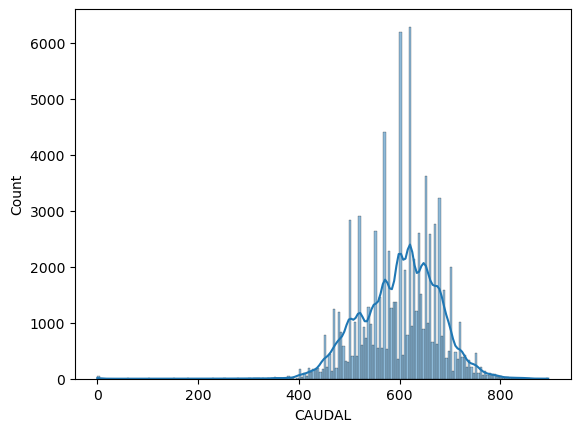

In [6]:
# Histograma de Caudal
sns.histplot(df['CAUDAL'], kde=True)
# Muestra el gráfico
plt.show()

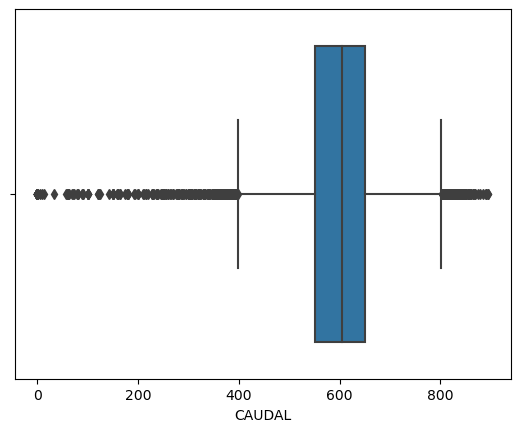

In [7]:
sns.boxplot(x=df['CAUDAL'])
plt.show()

Efectivamente se puede visualizar en el diagrama de cajas que los datos atípico están ubicados muy cerca a los límites dados por el ingeniero Mauricio

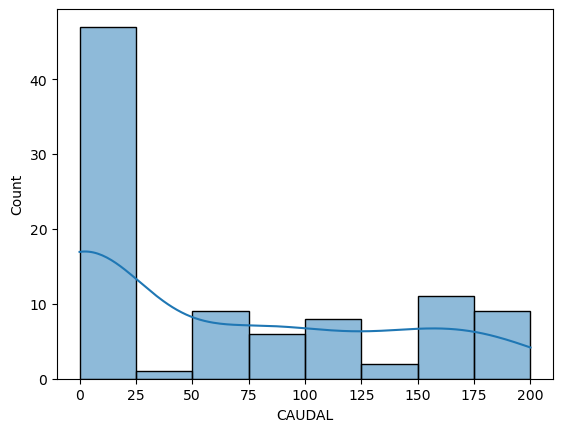

In [8]:
# Histograma de valores atípicos de Caudal
sns.histplot(df[df['CAUDAL']<=200]['CAUDAL'], kde=True)
# Muestra el gráfico
plt.show()

In [9]:
df[df['CAUDAL']==150]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,...,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU,VEL_VIENTO,PRECIPITACION,TEMP_SECA,TEMP_HUMEDA,PRECIPITACION2
62832,2020-03-03,1,150.0,NaN,NaN,8.9,17.4,9.5,26.0,51.5,...,1.400,16.0,7.10,1.1,1.5,0.908333,0.0,NaN,NaN,0.0
78863,2021-12-30,24,150.0,NaN,NaN,7.2,425.0,322.0,19.0,38.7,...,1.500,12.0,6.50,4.0,1.5,NaN,0.0,NaN,NaN,0.0
78864,2021-12-31,1,150.0,NaN,NaN,7.2,425.0,322.0,19.0,38.6,...,1.500,15.0,6.74,4.0,1.3,NaN,0.0,NaN,NaN,0.0
79964,2022-02-14,21,150.0,NaN,NaN,6.5,2246.0,1348.0,20.0,24.7,...,1.477,15.0,6.30,5.0,1.8,NaN,0.0,NaN,NaN,0.0
80201,2022-02-24,18,150.0,NaN,NaN,7.4,109.0,59.1,21.0,38.6,...,1.300,10.0,6.80,2.0,1.8,NaN,0.0,19.0,18.2,0.0


Se hizo una revisión de valores de caudal cero, en unos casos se suspendió el tratamiento de la planta, a eso se debe que el valor de caudal en estos casos sea cero, por ejemplo el 20 de septiembre de 2015 o 5 de marzo del 2020 o hay casos en los que se merma el caudal desde la bocatoma por taponamiento como el 23 de febrero del 2022 y el 9 de abril del 2017

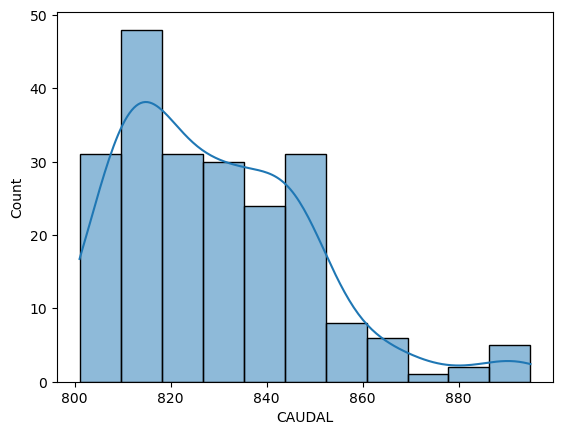

In [10]:
# Histograma de valores atípicos de Caudal
sns.histplot(df[df['CAUDAL']>800]['CAUDAL'], kde=True)
# Muestra el gráfico
plt.show()

In [11]:
df[(df['CAUDAL'] >= 850)]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,...,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU,VEL_VIENTO,PRECIPITACION,TEMP_SECA,TEMP_HUMEDA,PRECIPITACION2
470,2013-01-20,15,857.0000,NaN,NaN,6.9,10.6,4.5,NaN,NaN,...,1.9,NaN,6.6,7.1,1.5,1.666667,NaN,NaN,NaN,NaN
3660,2013-06-02,13,855.5410,NaN,NaN,7.5,NaN,7.0,NaN,NaN,...,0.9,NaN,6.9,NaN,0.6,1.950000,NaN,25.0,19.8,NaN
3851,2013-06-10,12,858.0000,NaN,NaN,7.4,NaN,1.4,NaN,NaN,...,1.0,NaN,7.2,NaN,0.7,4.000000,NaN,NaN,NaN,NaN
3854,2013-06-10,15,884.0000,NaN,NaN,7.4,NaN,1.4,NaN,NaN,...,1.0,NaN,7.2,NaN,0.7,1.750000,NaN,NaN,NaN,NaN
4019,2013-06-17,12,865.0861,NaN,NaN,7.8,NaN,2.0,NaN,NaN,...,0.9,NaN,7.4,NaN,0.5,1.825000,NaN,NaN,NaN,NaN
4648,2013-07-13,17,879.0000,NaN,NaN,7.8,NaN,1.8,NaN,NaN,...,0.7,NaN,7.0,NaN,0.6,1.675000,NaN,NaN,NaN,NaN
7447,2013-11-07,8,874.0000,NaN,NaN,7.9,14.8,3.1,NaN,NaN,...,1.2,NaN,7.2,6.6,1.1,1.450000,NaN,NaN,NaN,NaN
7566,2013-11-12,7,851.0000,NaN,NaN,7.5,13.7,2.5,NaN,NaN,...,0.5,NaN,7.0,13.3,1.6,0.908333,NaN,14.8,NaN,NaN
8312,2013-12-13,9,860.0000,NaN,NaN,7.7,7.2,2.6,NaN,NaN,...,0.9,NaN,7.4,3.5,1.1,1.208333,NaN,NaN,NaN,NaN
9489,2014-01-31,10,851.0000,NaN,NaN,7.5,27.0,6.9,NaN,NaN,...,1.1,NaN,6.7,9.0,1.5,2.033333,NaN,NaN,NaN,NaN


### AGUA_CRUDA_P.H

In [12]:
# Descripción estadística de pH
df['AGUA_CRUDA_P.H'].describe()

count    86715.000000
mean         7.580375
std          0.287601
min          5.900000
25%          7.400000
50%          7.600000
75%          7.800000
max          9.700000
Name: AGUA_CRUDA_P.H, dtype: float64

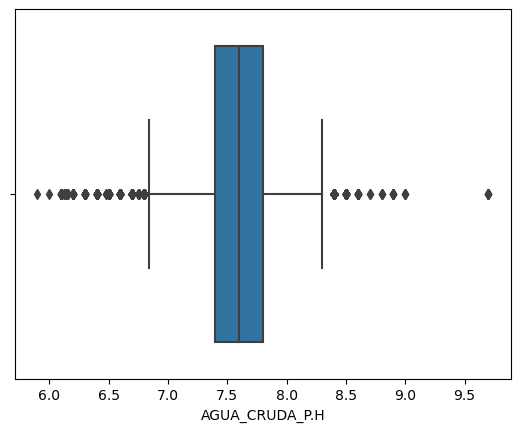

In [13]:
sns.boxplot(x=df['AGUA_CRUDA_P.H'])
plt.show()

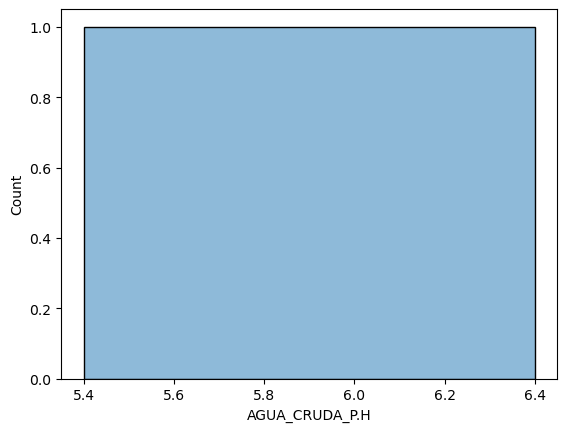

In [14]:
# Histograma de valores atípicos de pH
sns.histplot(df[df['AGUA_CRUDA_P.H']<6]['AGUA_CRUDA_P.H'], kde=True)
# Muestra el gráfico
plt.show()

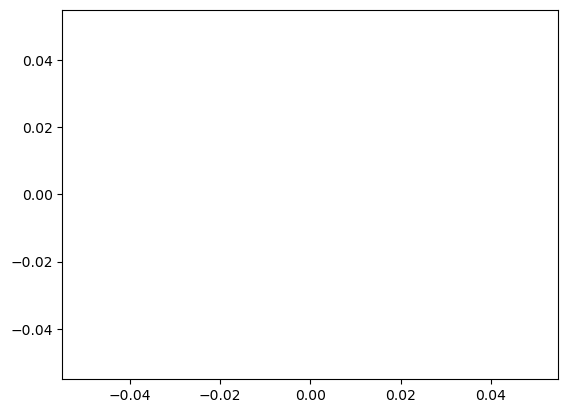

In [15]:
# Histograma de valores atípicos de pH
sns.histplot(df[df['AGUA_CRUDA_P.H']>10]['AGUA_CRUDA_P.H'], kde=True)
# Muestra el gráfico
plt.show()

In [16]:
df[(df['AGUA_CRUDA_P.H'] > 10)]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,...,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU,VEL_VIENTO,PRECIPITACION,TEMP_SECA,TEMP_HUMEDA,PRECIPITACION2


### AGUA_CRUDA_COLOR

In [17]:
# Descripción estadística de color
df['AGUA_CRUDA_COLOR'].describe()

count    81227.000000
mean        27.935323
std         90.647107
min          0.000000
25%          8.000000
50%         11.200000
75%         20.000000
max       4100.000000
Name: AGUA_CRUDA_COLOR, dtype: float64

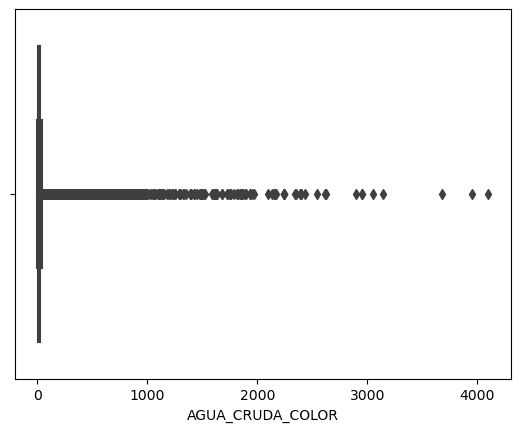

In [18]:
sns.boxplot(x=df['AGUA_CRUDA_COLOR'])
plt.show()

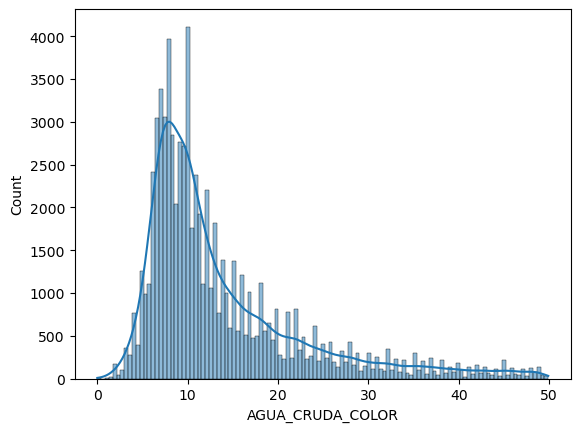

In [19]:
# Histograma de Caudal
sns.histplot(df[df['AGUA_CRUDA_COLOR']<50]['AGUA_CRUDA_COLOR'], kde=True)
# Muestra el gráfico
plt.show()

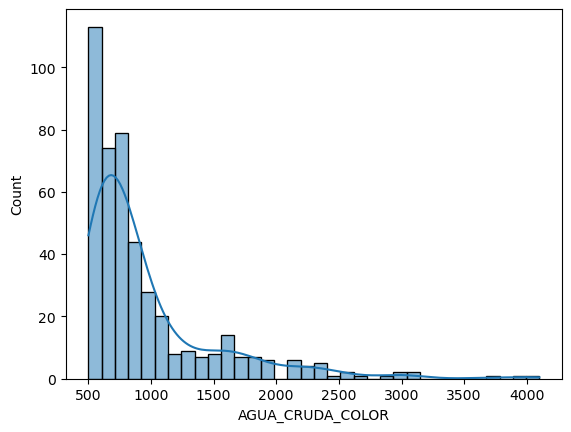

In [20]:
# Histograma de valores atípicos de Color
sns.histplot(df[df['AGUA_CRUDA_COLOR']>500]['AGUA_CRUDA_COLOR'], kde=True)
# Muestra el gráfico
plt.show()

In [21]:
df[(df['AGUA_CRUDA_COLOR'] > 500)]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,...,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU,VEL_VIENTO,PRECIPITACION,TEMP_SECA,TEMP_HUMEDA,PRECIPITACION2
381,2013-01-16,22,536.0,NaN,NaN,7.6,789.0,452.8,NaN,NaN,...,1.0,NaN,6.5,10.0,1.5,NaN,NaN,NaN,NaN,NaN
382,2013-01-16,23,546.0,NaN,NaN,7.6,789.0,452.8,NaN,NaN,...,1.0,NaN,6.5,10.0,1.5,NaN,NaN,NaN,NaN,NaN
383,2013-01-16,24,640.0,NaN,NaN,7.6,789.0,452.8,NaN,NaN,...,1.0,NaN,6.5,10.0,1.5,NaN,NaN,NaN,NaN,NaN
384,2013-01-17,1,528.0,NaN,NaN,7.6,789.0,452.8,NaN,NaN,...,1.0,NaN,6.5,10.0,1.5,NaN,NaN,NaN,NaN,NaN
385,2013-01-17,2,522.0,NaN,NaN,7.6,789.0,452.8,NaN,NaN,...,1.0,NaN,6.5,10.0,1.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87506,2022-12-26,3,480.0,NaN,NaN,7.1,600.0,415.0,16.0,35.9,...,NaN,8.0,6.5,3.0,1.7,0.458333,0.0,NaN,NaN,NaN
87619,2022-12-30,20,520.0,NaN,NaN,7.3,4100.0,2000.0,29.0,58.3,...,NaN,14.0,6.8,2.0,1.3,0.725000,0.0,NaN,NaN,NaN
87620,2022-12-30,21,520.0,NaN,NaN,7.3,2900.0,1500.0,29.0,58.3,...,NaN,14.0,6.9,2.5,1.3,1.200000,0.0,NaN,NaN,NaN
87621,2022-12-30,22,520.0,NaN,NaN,7.3,2400.0,1100.0,29.0,58.3,...,1.4,14.0,6.6,2.5,1.3,1.708333,0.0,NaN,NaN,NaN


In [22]:
df[(df['AGUA_CRUDA_COLOR'] > 2000)]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,...,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU,VEL_VIENTO,PRECIPITACION,TEMP_SECA,TEMP_HUMEDA,PRECIPITACION2
929,2013-02-08,18,456.0000,NaN,NaN,7.3,2350.0,5035.0,NaN,NaN,...,1.000,NaN,6.6,4.3,1.6,1.625000,NaN,17.0,16.8,NaN
1946,2013-03-23,3,457.0000,NaN,NaN,7.1,3050.0,2043.0,NaN,NaN,...,1.000,NaN,6.8,2.4,0.8,1.350000,NaN,NaN,NaN,NaN
8080,2013-12-03,17,630.8844,NaN,NaN,7.3,3680.0,1840.0,NaN,NaN,...,1.200,NaN,6.5,8.0,1.6,1.066667,NaN,NaN,NaN,NaN
8081,2013-12-03,18,669.5022,NaN,NaN,7.3,3140.0,1570.0,NaN,NaN,...,1.300,NaN,6.5,9.4,1.8,0.866667,NaN,17.6,NaN,NaN
16964,2014-12-08,21,357.0000,NaN,NaN,7.1,2954.0,2500.0,21.0,NaN,...,1.200,NaN,6.5,NaN,0.8,1.308333,NaN,NaN,NaN,NaN
16965,2014-12-08,22,180.0000,NaN,NaN,7.0,2954.0,2400.0,NaN,NaN,...,1.200,NaN,6.5,NaN,0.8,1.400000,NaN,NaN,NaN,NaN
16971,2014-12-09,4,600.0000,NaN,NaN,7.0,2400.0,1786.0,NaN,NaN,...,1.200,NaN,6.5,NaN,0.8,1.608333,NaN,NaN,NaN,NaN
16972,2014-12-09,5,610.0000,NaN,NaN,7.0,2150.0,1433.0,NaN,NaN,...,1.200,NaN,6.5,NaN,1.3,1.366667,NaN,NaN,NaN,NaN
44616,2018-02-03,1,675.0000,NaN,NaN,7.5,2245.0,1884.0,26.0,55.4,...,1.300,NaN,7.0,5.1,1.1,2.341667,0.0,NaN,NaN,NaN
44617,2018-02-03,2,569.0000,NaN,NaN,7.5,2245.0,1884.0,26.0,55.4,...,1.300,NaN,7.0,5.1,1.6,1.316667,0.0,NaN,NaN,NaN


### AGUA_CRUDA_NTU

In [23]:
# Descripción estadística de turbiedad
df['AGUA_CRUDA_NTU'].describe()

count    86984.000000
mean        15.026284
std         69.993169
min          0.400000
25%          2.200000
50%          3.000000
75%          6.700000
max       5035.000000
Name: AGUA_CRUDA_NTU, dtype: float64

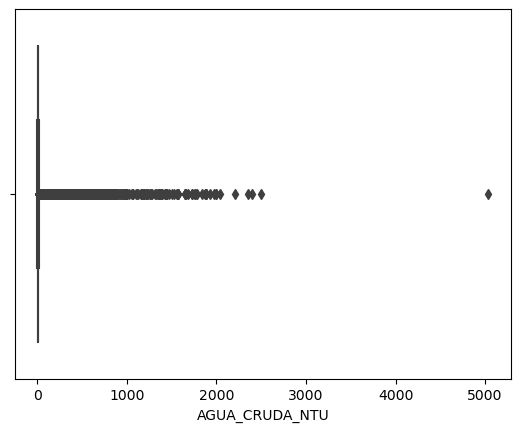

In [24]:
sns.boxplot(x=df['AGUA_CRUDA_NTU'])
plt.show()

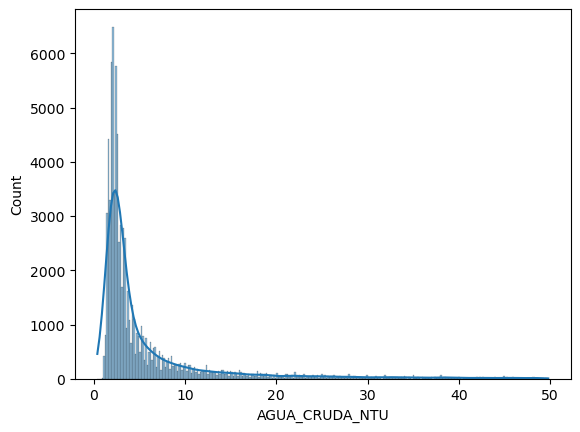

In [25]:
# Histograma de Caudal
sns.histplot(df[df['AGUA_CRUDA_NTU']<50]['AGUA_CRUDA_NTU'], kde=True)
# Muestra el gráfico
plt.show()

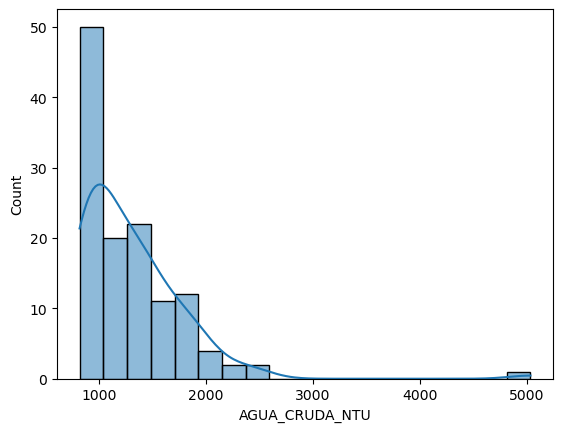

In [26]:
# Histograma de valores atípicos de turbiedad
sns.histplot(df[df['AGUA_CRUDA_NTU']>800]['AGUA_CRUDA_NTU'], kde=True)
# Muestra el gráfico
plt.show()

In [27]:
df[(df['AGUA_CRUDA_NTU'] > 800)]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,...,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU,VEL_VIENTO,PRECIPITACION,TEMP_SECA,TEMP_HUMEDA,PRECIPITACION2
929,2013-02-08,18,456.0000,NaN,NaN,7.3,2350.0,5035.0,NaN,NaN,...,1.0,NaN,6.6,4.3,1.6,1.625000,NaN,17.0,16.8,NaN
1946,2013-03-23,3,457.0000,NaN,NaN,7.1,3050.0,2043.0,NaN,NaN,...,1.0,NaN,6.8,2.4,0.8,1.350000,NaN,NaN,NaN,NaN
6858,2013-10-13,19,647.0000,NaN,NaN,7.6,725.6,864.1,NaN,NaN,...,1.2,NaN,6.8,8.6,1.3,0.550000,NaN,NaN,NaN,NaN
8080,2013-12-03,17,630.8844,NaN,NaN,7.3,3680.0,1840.0,NaN,NaN,...,1.2,NaN,6.5,8.0,1.6,1.066667,NaN,NaN,NaN,NaN
8081,2013-12-03,18,669.5022,NaN,NaN,7.3,3140.0,1570.0,NaN,NaN,...,1.3,NaN,6.5,9.4,1.8,0.866667,NaN,17.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86947,2022-12-02,20,600.0000,NaN,NaN,7.5,1786.0,1678.0,22.0,40.2,...,NaN,12.0,6.8,2.0,1.7,0.683333,0.0,NaN,NaN,0.0
86948,2022-12-02,21,600.0000,NaN,NaN,7.4,1385.0,1265.0,17.0,39.5,...,NaN,12.0,6.7,2.0,1.7,0.708333,0.0,NaN,NaN,0.0
87619,2022-12-30,20,520.0000,NaN,NaN,7.3,4100.0,2000.0,29.0,58.3,...,NaN,14.0,6.8,2.0,1.3,0.725000,0.0,NaN,NaN,NaN
87620,2022-12-30,21,520.0000,NaN,NaN,7.3,2900.0,1500.0,29.0,58.3,...,NaN,14.0,6.9,2.5,1.3,1.200000,0.0,NaN,NaN,NaN


In [28]:
df[(df['AGUA_CRUDA_NTU'] >= 1500)]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,...,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU,VEL_VIENTO,PRECIPITACION,TEMP_SECA,TEMP_HUMEDA,PRECIPITACION2
929,2013-02-08,18,456.0000,NaN,NaN,7.3,2350.0,5035.0,NaN,NaN,...,1.00,NaN,6.60,4.3,1.6,1.625000,NaN,17.0,16.8,NaN
1946,2013-03-23,3,457.0000,NaN,NaN,7.1,3050.0,2043.0,NaN,NaN,...,1.00,NaN,6.80,2.4,0.8,1.350000,NaN,NaN,NaN,NaN
8080,2013-12-03,17,630.8844,NaN,NaN,7.3,3680.0,1840.0,NaN,NaN,...,1.20,NaN,6.50,8.0,1.6,1.066667,NaN,NaN,NaN,NaN
8081,2013-12-03,18,669.5022,NaN,NaN,7.3,3140.0,1570.0,NaN,NaN,...,1.30,NaN,6.50,9.4,1.8,0.866667,NaN,17.6,NaN,NaN
8515,2013-12-21,20,539.0000,NaN,NaN,7.4,1965.0,1923.0,NaN,NaN,...,1.10,NaN,6.80,3.0,1.2,1.008333,NaN,NaN,NaN,NaN
16939,2014-12-07,20,628.0000,NaN,NaN,7.0,1950.0,1562.0,25.0,NaN,...,1.30,NaN,7.10,NaN,0.8,1.850000,NaN,NaN,NaN,NaN
16964,2014-12-08,21,357.0000,NaN,NaN,7.1,2954.0,2500.0,21.0,NaN,...,1.20,NaN,6.50,NaN,0.8,1.308333,NaN,NaN,NaN,NaN
16965,2014-12-08,22,180.0000,NaN,NaN,7.0,2954.0,2400.0,NaN,NaN,...,1.20,NaN,6.50,NaN,0.8,1.400000,NaN,NaN,NaN,NaN
16966,2014-12-08,23,620.0000,NaN,NaN,6.8,1840.0,1650.0,NaN,NaN,...,1.20,NaN,6.50,NaN,0.8,1.633333,NaN,NaN,NaN,NaN
16971,2014-12-09,4,600.0000,NaN,NaN,7.0,2400.0,1786.0,NaN,NaN,...,1.20,NaN,6.50,NaN,0.8,1.608333,NaN,NaN,NaN,NaN


### AGUA_CRUDA_ALCALINIDAD

In [29]:
# Descripción estadística de alcalinidad
df['AGUA_CRUDA_ALCALINIDAD'].describe()

count    68371.000000
mean        33.205190
std          6.674195
min          0.000000
25%         28.700000
50%         33.800000
75%         38.000000
max         90.800000
Name: AGUA_CRUDA_ALCALINIDAD, dtype: float64

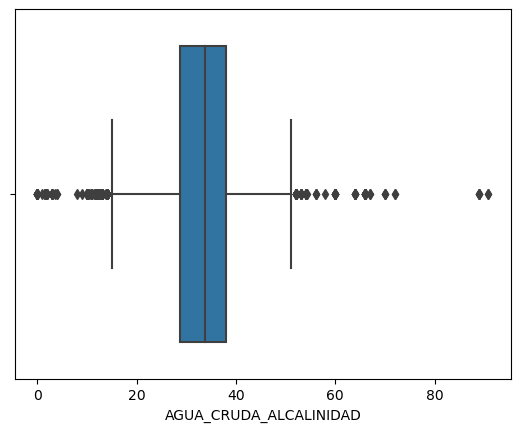

In [30]:
sns.boxplot(x=df['AGUA_CRUDA_ALCALINIDAD'])
plt.show()

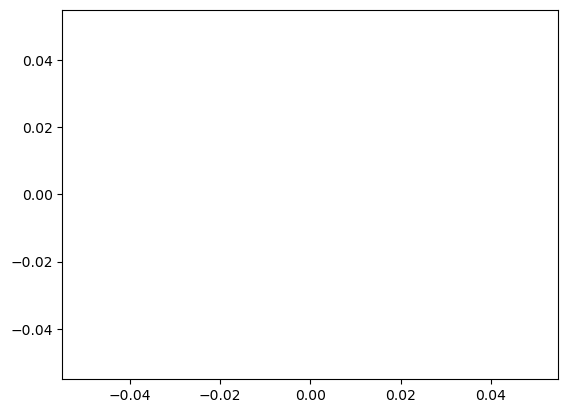

In [31]:
# Histograma de valores atípicos de turbiedad
sns.histplot(df[df['AGUA_CRUDA_ALCALINIDAD']>100]['AGUA_CRUDA_ALCALINIDAD'], kde=True)
# Muestra el gráfico
plt.show()

In [32]:
df[(df['AGUA_CRUDA_ALCALINIDAD'] > 100)]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,...,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU,VEL_VIENTO,PRECIPITACION,TEMP_SECA,TEMP_HUMEDA,PRECIPITACION2


### AGUA_CRUDA_CONDUCTIVIDAD

In [33]:
# Descripción estadística de alcalinidad
df['AGUA_CRUDA_CONDUCTIVIDAD'].describe()

count    60089.000000
mean        72.140411
std         24.702999
min          0.000000
25%         56.900000
50%         69.600000
75%         81.600000
max        476.000000
Name: AGUA_CRUDA_CONDUCTIVIDAD, dtype: float64

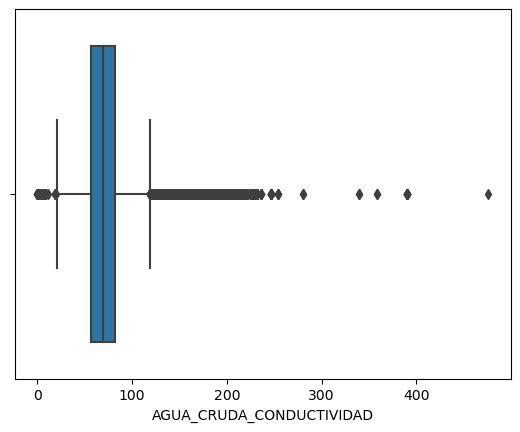

In [34]:
sns.boxplot(x=df['AGUA_CRUDA_CONDUCTIVIDAD'])
plt.show()

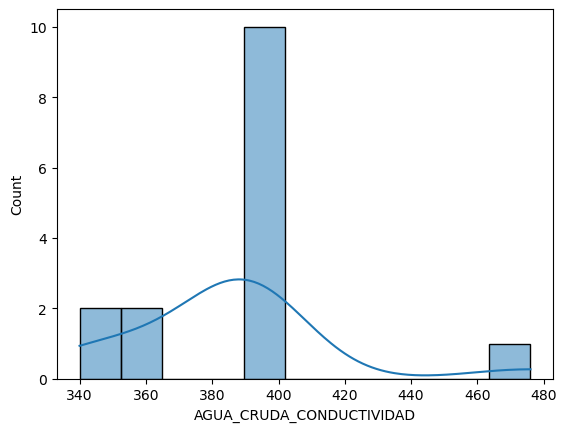

In [35]:
# Histograma de valores atípicos de turbiedad
sns.histplot(df[df['AGUA_CRUDA_CONDUCTIVIDAD']>300]['AGUA_CRUDA_CONDUCTIVIDAD'], kde=True)
# Muestra el gráfico
plt.show()

In [36]:
df[(df['AGUA_CRUDA_CONDUCTIVIDAD'] > 300)]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,...,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU,VEL_VIENTO,PRECIPITACION,TEMP_SECA,TEMP_HUMEDA,PRECIPITACION2
34178,2016-11-25,3,428.0,NaN,NaN,7.8,13.2,1.7,33.0,340.0,...,1.3,NaN,7.0,5.0,0.7,1.341667,NaN,NaN,NaN,NaN
34179,2016-11-25,4,460.0,NaN,NaN,7.8,13.2,1.7,33.0,340.0,...,1.3,NaN,7.0,5.0,0.7,1.066667,NaN,NaN,NaN,NaN
34180,2016-11-25,5,536.0,NaN,NaN,7.6,13.8,1.6,36.0,358.0,...,1.3,NaN,7.0,5.0,0.8,1.016667,NaN,NaN,NaN,NaN
34181,2016-11-25,6,611.0,NaN,NaN,7.6,13.8,1.6,36.0,358.0,...,1.3,NaN,7.0,5.0,0.8,0.708333,NaN,NaN,NaN,NaN
34182,2016-11-25,7,636.0,NaN,NaN,7.7,14.4,1.5,40.0,390.0,...,1.1,NaN,7.1,6.0,1.0,1.125000,NaN,17.0,16.4,NaN
34183,2016-11-25,8,645.0,NaN,NaN,7.7,14.4,1.5,40.0,390.0,...,1.1,NaN,7.1,6.0,1.0,1.333333,NaN,NaN,NaN,NaN
34184,2016-11-25,9,645.0,NaN,NaN,7.7,14.4,1.5,40.0,390.0,...,1.1,NaN,7.1,6.0,1.0,1.108333,NaN,NaN,NaN,NaN
34185,2016-11-25,10,645.0,NaN,NaN,7.7,14.4,1.5,40.0,390.0,...,1.1,NaN,7.1,6.0,1.0,NaN,NaN,NaN,NaN,NaN
34186,2016-11-25,11,645.0,NaN,NaN,7.7,14.4,1.5,40.0,390.0,...,1.1,NaN,7.1,6.0,1.0,NaN,NaN,NaN,NaN,NaN
34187,2016-11-25,12,658.0,NaN,NaN,7.7,14.4,1.5,40.0,390.0,...,1.1,NaN,7.1,6.0,1.0,NaN,NaN,NaN,NaN,NaN


### DOSIS DE COAGULANTE

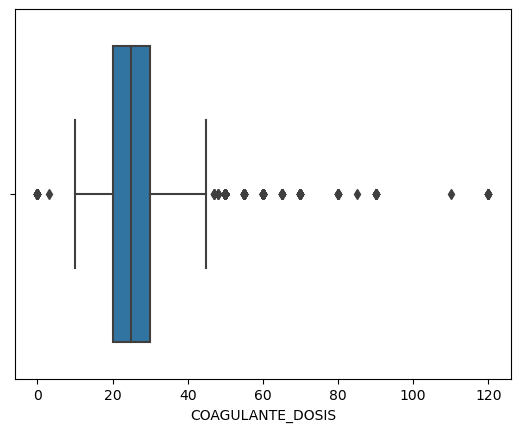

In [37]:
sns.boxplot(x=df['COAGULANTE_DOSIS'])
plt.show()

In [38]:
df[(df['COAGULANTE_DOSIS'] <=15 )].COAGULANTE_DOSIS.value_counts()

15.0    1351
10.0      87
0.0       28
12.0       5
3.0        1
Name: COAGULANTE_DOSIS, dtype: int64

### AGUA_TRATADA_P.H

In [39]:
# Descripción estadística de alcalinidad
df['AGUA_TRATADA_P.H'].describe()

count    84597.000000
mean         7.086989
std          0.333352
min          5.500000
25%          6.900000
50%          7.100000
75%          7.300000
max          9.200000
Name: AGUA_TRATADA_P.H, dtype: float64

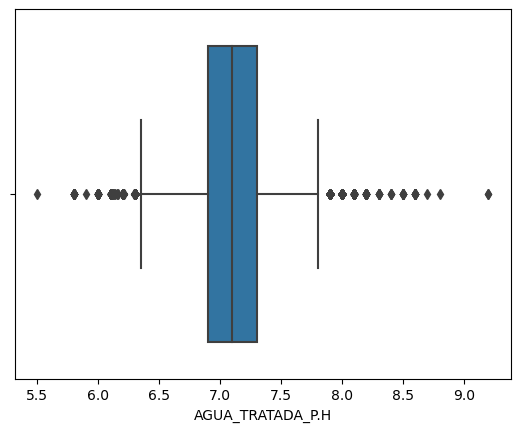

In [40]:
sns.boxplot(x=df['AGUA_TRATADA_P.H'])
plt.show()

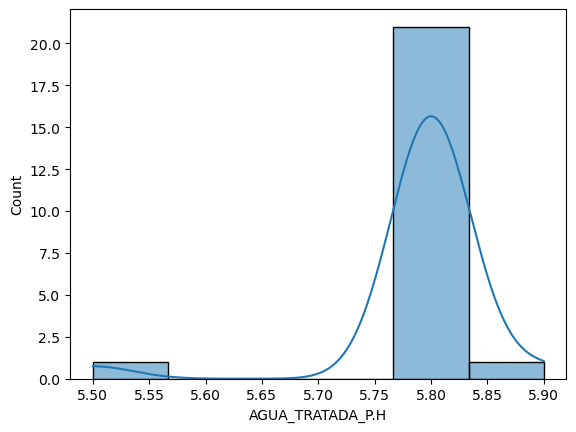

In [41]:
# Histograma de valores atípicos de pH
sns.histplot(df[df['AGUA_TRATADA_P.H']<6]['AGUA_TRATADA_P.H'], kde=True)
# Muestra el gráfico
plt.show()

In [42]:
df[(df['AGUA_TRATADA_P.H'] >=10)]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,...,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU,VEL_VIENTO,PRECIPITACION,TEMP_SECA,TEMP_HUMEDA,PRECIPITACION2


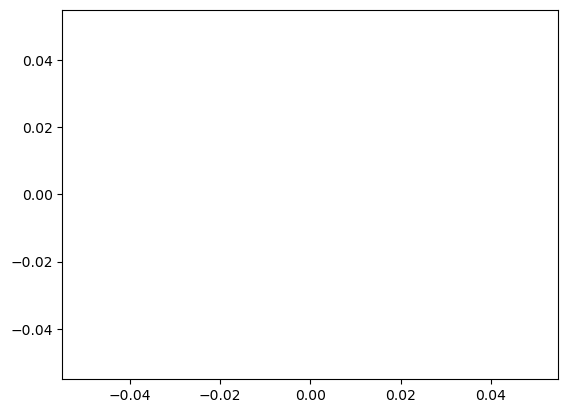

In [43]:
# Histograma de valores atípicos de pH
sns.histplot(df[df['AGUA_TRATADA_P.H']>9.5]['AGUA_TRATADA_P.H'], kde=True)
# Muestra el gráfico
plt.show()

### AGUA_TRATADA_COLOR

In [44]:
# Descripción estadística de alcalinidad
df['AGUA_TRATADA_COLOR'].describe()

count    78538.000000
mean         4.470495
std          2.291365
min          0.000000
25%          2.900000
50%          4.100000
75%          5.600000
max         18.000000
Name: AGUA_TRATADA_COLOR, dtype: float64

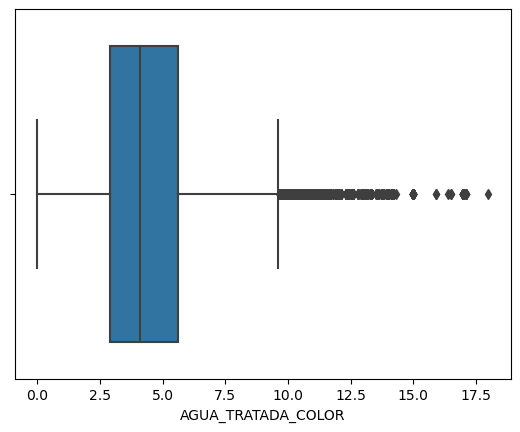

In [45]:
sns.boxplot(x=df['AGUA_TRATADA_COLOR'])
plt.show()

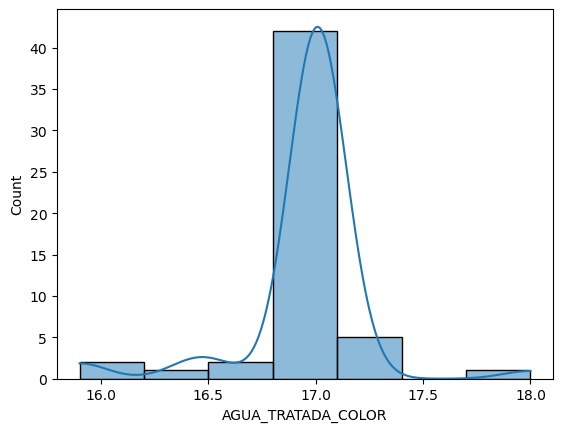

In [46]:
# Histograma de valores atípicos de pH
sns.histplot(df[df['AGUA_TRATADA_COLOR']>15]['AGUA_TRATADA_COLOR'], kde=True)
# Muestra el gráfico
plt.show()

In [47]:
df[(df['AGUA_TRATADA_COLOR'] > 15)]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,...,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU,VEL_VIENTO,PRECIPITACION,TEMP_SECA,TEMP_HUMEDA,PRECIPITACION2
16649,2014-11-25,18,650.0,NaN,NaN,7.6,21.0,3.5,NaN,NaN,...,1.00,NaN,7.1,17.0,1.2,0.716667,NaN,17.6,NaN,NaN
16650,2014-11-25,19,600.0,NaN,NaN,7.6,21.0,3.5,NaN,NaN,...,1.00,NaN,7.1,17.0,1.2,1.116667,NaN,NaN,NaN,NaN
16651,2014-11-25,20,600.0,NaN,NaN,7.6,21.0,3.5,NaN,NaN,...,1.00,NaN,7.1,17.0,1.2,0.866667,NaN,NaN,NaN,NaN
16652,2014-11-25,21,530.0,NaN,NaN,7.6,21.0,3.5,NaN,NaN,...,1.00,NaN,7.1,17.0,1.2,0.516667,NaN,NaN,NaN,NaN
16653,2014-11-25,22,530.0,NaN,NaN,7.6,21.0,3.5,NaN,NaN,...,1.00,NaN,7.1,17.0,1.2,0.866667,NaN,NaN,NaN,NaN
16654,2014-11-25,23,580.0,NaN,NaN,7.6,21.0,3.5,NaN,NaN,...,1.00,NaN,7.1,17.0,1.2,0.833333,NaN,NaN,NaN,NaN
16655,2014-11-25,24,580.0,NaN,NaN,7.6,21.0,3.5,NaN,NaN,...,1.00,NaN,7.1,17.0,1.2,1.108333,NaN,NaN,NaN,NaN
16656,2014-11-26,1,554.0,NaN,NaN,7.6,21.0,3.5,NaN,NaN,...,1.00,NaN,7.1,17.0,1.2,0.333333,NaN,NaN,NaN,NaN
16657,2014-11-26,2,557.0,NaN,NaN,7.6,21.0,3.5,NaN,NaN,...,1.00,NaN,7.3,17.0,1.8,0.433333,NaN,NaN,NaN,NaN
16658,2014-11-26,3,615.0,NaN,NaN,7.6,21.0,4.1,NaN,NaN,...,1.00,NaN,7.3,17.0,1.8,0.591667,NaN,NaN,NaN,NaN


### AGUA_TRATADA_NTU

In [48]:
# Descripción estadística de alcalinidad
df['AGUA_TRATADA_NTU'].describe()

count    84771.000000
mean         1.068493
std          0.366188
min          0.000000
25%          0.800000
50%          1.000000
75%          1.300000
max          6.500000
Name: AGUA_TRATADA_NTU, dtype: float64

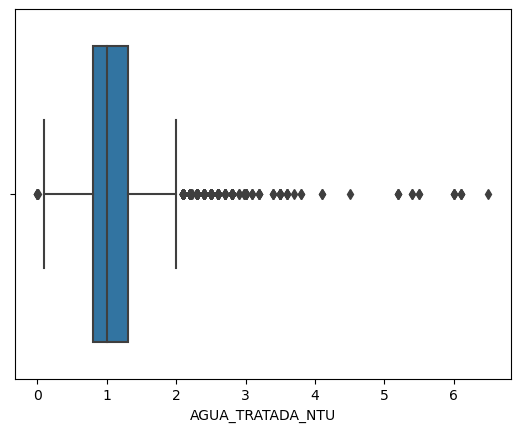

In [49]:
sns.boxplot(x=df['AGUA_TRATADA_NTU'])
plt.show()

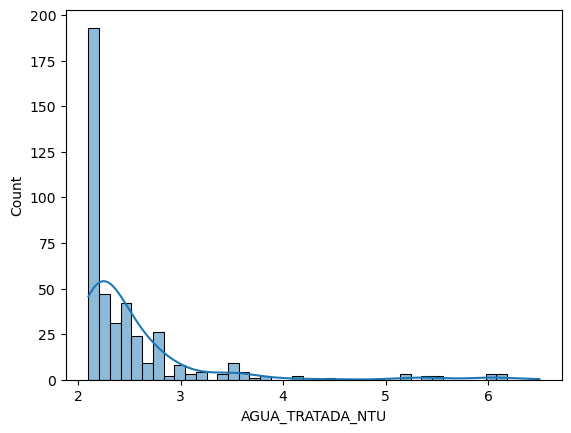

In [50]:
# Histograma de valores atípicos de pH
sns.histplot(df[df['AGUA_TRATADA_NTU']>2]['AGUA_TRATADA_NTU'], kde=True)
# Muestra el gráfico
plt.show()

In [51]:
df[(df['AGUA_TRATADA_NTU'] > 3) & (df['AGUA_TRATADA_NTU'] <= 4)]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,...,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU,VEL_VIENTO,PRECIPITACION,TEMP_SECA,TEMP_HUMEDA,PRECIPITACION2
41703,2017-10-04,16,640.0,NaN,NaN,7.7,36.8,15.4,37.0,75.0,...,0.8,NaN,7.2,17.1,3.5,1.375000,0.0,NaN,NaN,NaN
60200,2019-11-14,9,640.0,NaN,NaN,7.0,42.1,15.1,26.0,51.3,...,1.5,10.0,6.7,6.2,3.4,1.050000,0.0,NaN,NaN,NaN
60201,2019-11-14,10,650.0,NaN,NaN,7.0,39.4,14.6,26.0,51.2,...,1.5,10.0,6.7,6.1,3.2,1.441667,0.0,NaN,NaN,NaN
60202,2019-11-14,11,650.0,NaN,NaN,7.1,34.8,11.7,25.0,50.7,...,1.3,10.0,6.7,8.5,3.6,1.558333,0.0,NaN,NaN,NaN
60203,2019-11-14,12,650.0,NaN,NaN,7.1,36.5,11.3,25.0,50.5,...,1.3,9.0,6.7,8.6,3.8,1.433333,0.0,NaN,NaN,NaN
60204,2019-11-14,13,650.0,NaN,NaN,7.1,32.3,10.5,25.0,52.6,...,1.4,9.0,6.7,8.2,3.7,2.525000,0.0,NaN,NaN,NaN
60205,2019-11-14,14,650.0,NaN,NaN,7.0,29.4,9.2,25.0,55.3,...,1.4,10.0,6.8,7.3,3.5,2.283333,0.0,NaN,NaN,NaN
60206,2019-11-14,15,650.0,NaN,NaN,7.0,30.4,9.1,26.0,55.2,...,1.4,10.0,6.8,7.5,3.4,1.000000,0.0,NaN,NaN,NaN
60207,2019-11-14,16,650.0,NaN,NaN,7.0,31.6,9.3,26.0,54.7,...,1.4,8.0,6.8,7.4,3.5,1.800000,0.0,NaN,NaN,NaN
60208,2019-11-14,17,660.0,NaN,NaN,7.2,45.9,12.9,25.0,55.6,...,1.5,10.0,6.9,6.0,3.1,0.900000,0.0,NaN,NaN,NaN


### AGUA_TRATADA_ALCALINIDAD

In [52]:
# Descripción estadística de alcalinidad
df['AGUA_TRATADA_ALCALINIDAD'].describe()

count    36156.000000
mean        25.760821
std          8.877945
min          0.000000
25%         18.000000
50%         26.000000
75%         33.000000
max         60.000000
Name: AGUA_TRATADA_ALCALINIDAD, dtype: float64

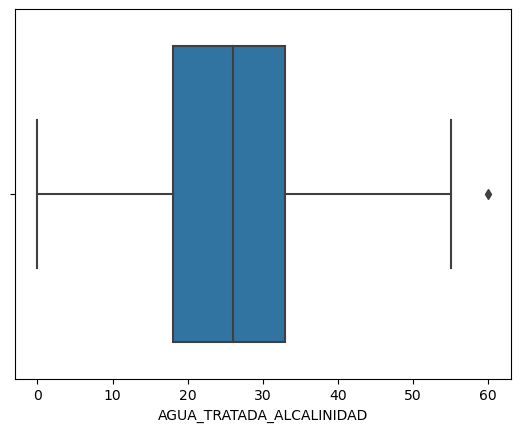

In [53]:
sns.boxplot(x=df['AGUA_TRATADA_ALCALINIDAD'])
plt.show()

In [54]:
df[(df['AGUA_TRATADA_ALCALINIDAD'] >=100)]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,...,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU,VEL_VIENTO,PRECIPITACION,TEMP_SECA,TEMP_HUMEDA,PRECIPITACION2


### AGUA_TRATADA_CLORO

In [55]:
# Descripción estadística de cloro
df['AGUA_TRATADA_CLORO'].describe()

count    77295.000000
mean         1.211784
std          0.195687
min          0.000000
25%          1.100000
50%          1.200000
75%          1.400000
max          2.200000
Name: AGUA_TRATADA_CLORO, dtype: float64

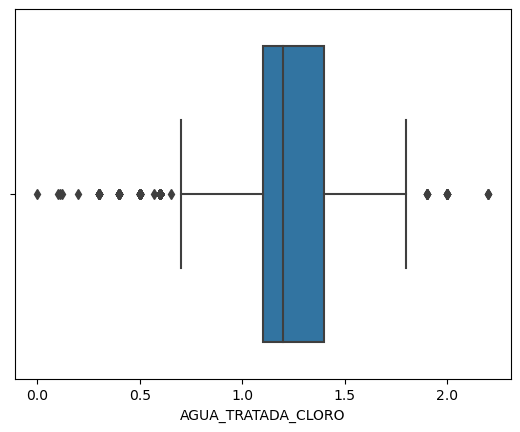

In [56]:
sns.boxplot(x=df['AGUA_TRATADA_CLORO'])
plt.show()

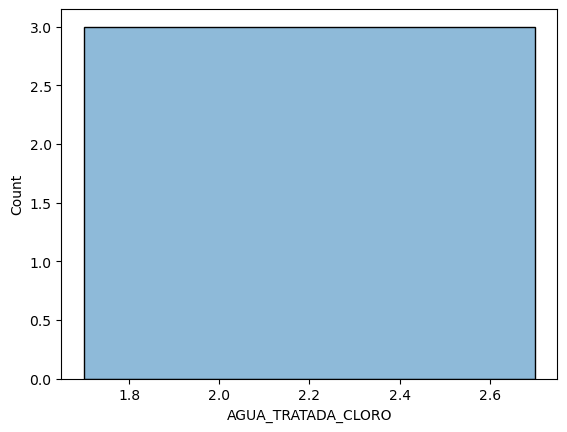

In [57]:
# Histograma de valores atípicos de pH
sns.histplot(df[df['AGUA_TRATADA_CLORO']>2]['AGUA_TRATADA_CLORO'], kde=True)
# Muestra el gráfico
plt.show()

In [58]:
df[(df['AGUA_TRATADA_CLORO'] >2) ]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,...,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU,VEL_VIENTO,PRECIPITACION,TEMP_SECA,TEMP_HUMEDA,PRECIPITACION2
3837,2013-06-09,22,437.0,NaN,NaN,7.3,NaN,2.7,NaN,NaN,...,2.2,NaN,7.1,NaN,0.7,2.058333,NaN,NaN,NaN,NaN
3838,2013-06-09,23,415.0,NaN,NaN,7.3,NaN,2.7,NaN,NaN,...,2.2,NaN,7.2,NaN,0.7,1.991667,NaN,NaN,NaN,NaN
3839,2013-06-09,24,437.0,NaN,NaN,7.3,NaN,2.7,NaN,NaN,...,2.2,NaN,7.3,NaN,0.7,1.950000,NaN,NaN,NaN,NaN


In [59]:
condition = ((df['FECHA'].dt.year.isin([2020, 2021, 2022])) & (df['VEL_VIENTO'].isnull()))
df.loc[condition, 'PRECIPITACION'] = float('nan')
condition = ((df_edit['FECHA'].dt.year.isin([2020, 2021, 2022])) & (df_edit['VEL_VIENTO'].isnull()))
df_edit.loc[condition, 'PRECIPITACION'] = float('nan')

## Ánalisis sin outliers

In [60]:
df_without_outliers = df[
    (df.AGUA_CRUDA_COLOR < 500) | (df.AGUA_CRUDA_COLOR.isnull())
]

df_without_outliers = df_without_outliers[
    (df_without_outliers.AGUA_CRUDA_NTU < 800) | (df_without_outliers.AGUA_CRUDA_NTU.isnull())
]

df_without_outliers = df_without_outliers[
    ((df_without_outliers.CAUDAL <= 800) & (df_without_outliers.CAUDAL >= 200)) | (df_without_outliers.CAUDAL.isnull())
]

df_without_outliers = df_without_outliers[
    (df_without_outliers.AGUA_CRUDA_ALCALINIDAD <= 100) | (df_without_outliers.AGUA_CRUDA_ALCALINIDAD.isnull())
]
df_without_outliers = df_without_outliers[
    ((df_without_outliers.COAGULANTE_DOSIS <= 50) & (df_without_outliers.COAGULANTE_DOSIS > 12)) | (df_without_outliers.COAGULANTE_DOSIS.isnull())
]
df_without_outliers.shape

(86714, 23)

In [61]:
df_without_outliers_edit = df_edit[
    (df_edit.AGUA_CRUDA_COLOR < 500) | (df_edit.AGUA_CRUDA_COLOR.isnull())
]

df_without_outliers_edit = df_without_outliers_edit[
    (df_without_outliers_edit.AGUA_CRUDA_NTU < 800) | (df_without_outliers_edit.AGUA_CRUDA_NTU.isnull())
]

df_without_outliers_edit = df_without_outliers_edit[
    ((df_without_outliers_edit.CAUDAL <= 800) & (df_without_outliers_edit.CAUDAL >= 200)) | (df_without_outliers_edit.CAUDAL.isnull())
]

df_without_outliers_edit = df_without_outliers_edit[
    (df_without_outliers_edit.AGUA_CRUDA_ALCALINIDAD <= 100) | (df_without_outliers_edit.AGUA_CRUDA_ALCALINIDAD.isnull())
]

df_without_outliers_edit = df_without_outliers_edit[
    ((df_without_outliers_edit.COAGULANTE_DOSIS <= 50) & (df_without_outliers_edit.COAGULANTE_DOSIS > 12)) | (df_without_outliers_edit.COAGULANTE_DOSIS.isnull())
]
df_without_outliers_edit.shape

(52234, 23)

In [62]:
# Listado de columnas de interés
cols = ['AGUA_CRUDA_P.H', 'AGUA_CRUDA_COLOR', 'AGUA_CRUDA_NTU', 'AGUA_CRUDA_ALCALINIDAD', 'AGUA_CRUDA_CONDUCTIVIDAD']

# Eliminar las filas donde todas las columnas especificadas son nulas
df_without_outliers = df_without_outliers.dropna(subset=cols, how='all')
df_without_outliers_edit = df_without_outliers_edit.dropna(subset=cols, how='all')

In [63]:
HEADERS_LIQUIDO = ['FECHA', 'HORA', 'CAUDAL', 'AGUA_CRUDA_P.H', 'AGUA_CRUDA_COLOR', 'AGUA_CRUDA_NTU', 'AGUA_CRUDA_ALCALINIDAD', 
                   'AGUA_CRUDA_CONDUCTIVIDAD', 'COAGULANTE_LIQUIDO', 'COAGULANTE_DOSIS','AGUA_TRATADA_CLORO', 
                   'AGUA_TRATADA_ALCALINIDAD', 'AGUA_TRATADA_P.H', 'AGUA_TRATADA_COLOR', 'AGUA_TRATADA_NTU']

HEADERS_GRANULADO = ['FECHA', 'HORA', 'CAUDAL', 'CAL_1RIA_KG', 'CAL_1RIA_DOSIS', 'AGUA_CRUDA_P.H', 'AGUA_CRUDA_COLOR', 
                     'AGUA_CRUDA_NTU', 'AGUA_CRUDA_ALCALINIDAD', 'AGUA_CRUDA_CONDUCTIVIDAD', 'COAGULANTE_GRANULADO', 
                     'COAGULANTE_DOSIS', 'AGUA_TRATADA_CLORO', 'AGUA_TRATADA_ALCALINIDAD', 'AGUA_TRATADA_P.H', 
                     'AGUA_TRATADA_COLOR', 'AGUA_TRATADA_NTU']

In [64]:
df_liquido = df_without_outliers[df_without_outliers['COAGULANTE_LIQUIDO'].notnull()]
df_liquido = df_liquido[HEADERS_LIQUIDO]
df_granulado = df_without_outliers[df_without_outliers['COAGULANTE_LIQUIDO'].isnull()]
df_granulado = df_granulado[HEADERS_GRANULADO]

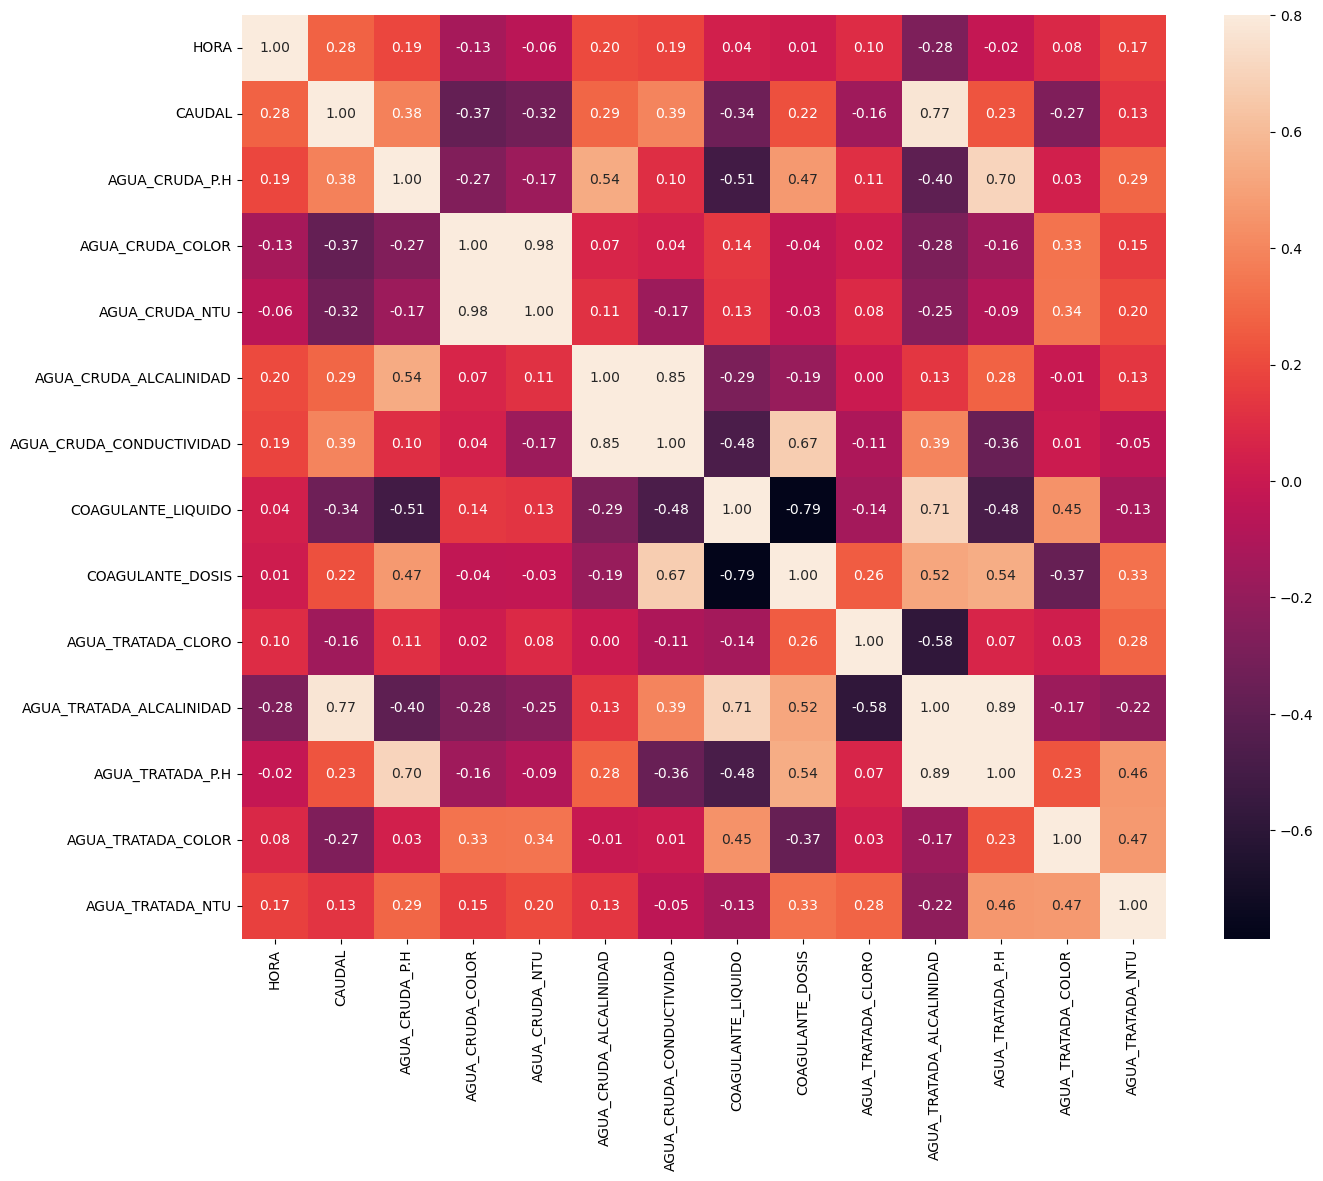

In [65]:
# Matriz de correlación:
corrmat = df_liquido.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

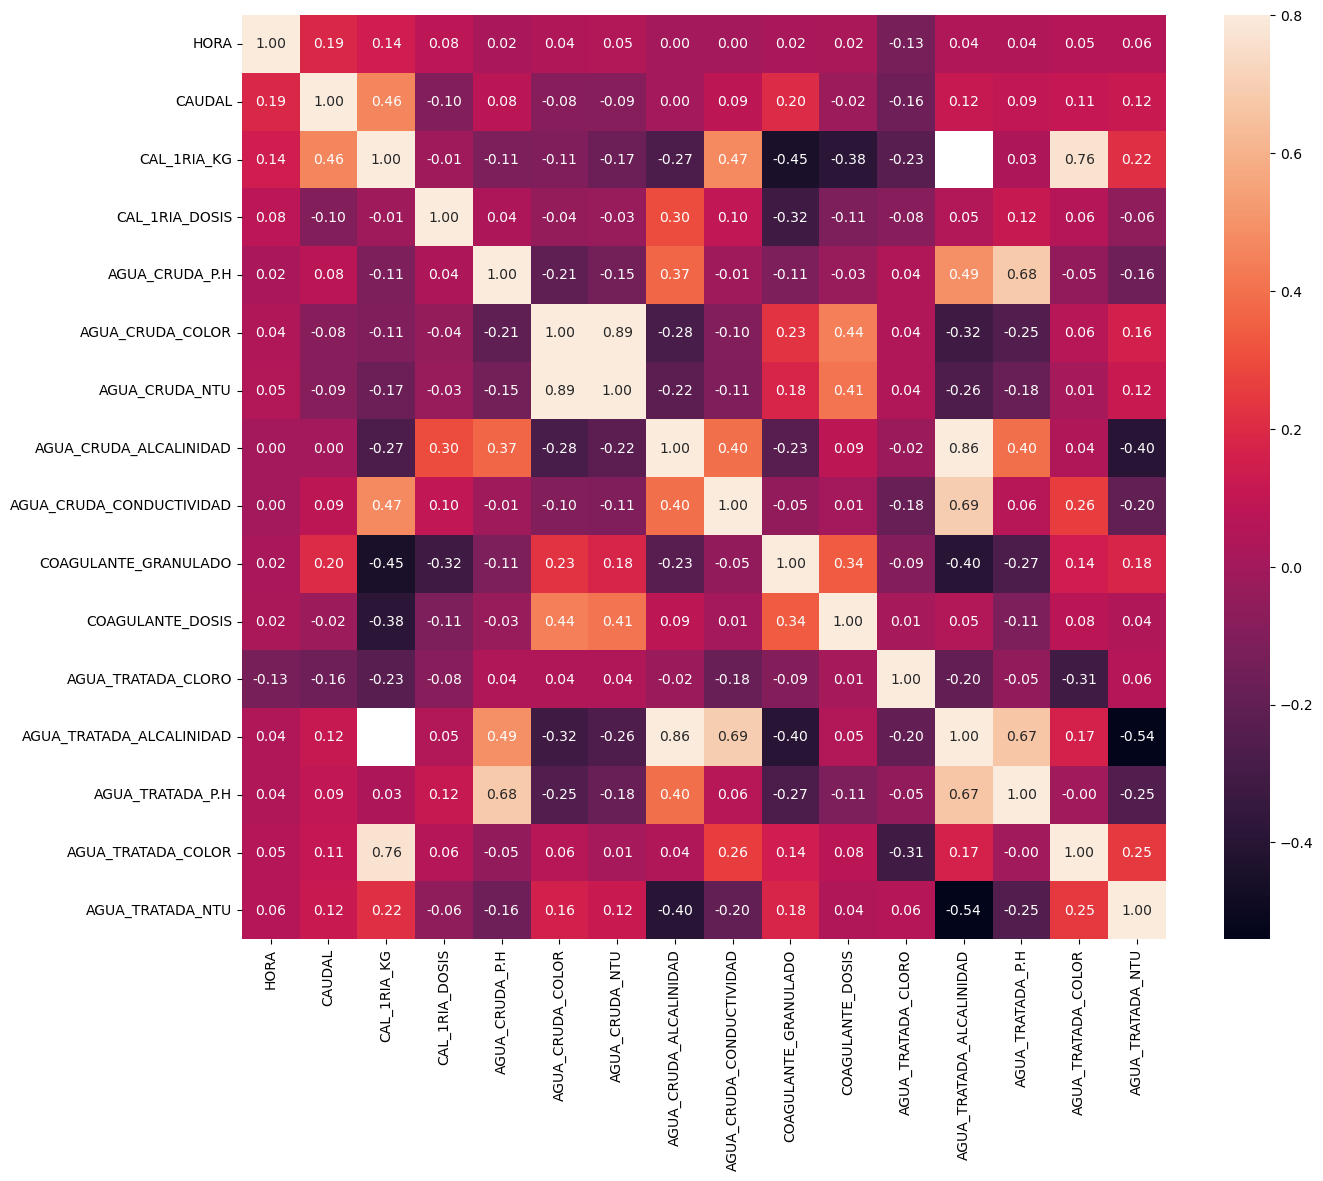

In [66]:
# Matriz de correlación:
corrmat = df_granulado.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

In [67]:
df_without_outliers[['AGUA_TRATADA_CLORO', 'AGUA_TRATADA_ALCALINIDAD', 'AGUA_TRATADA_P.H', 'AGUA_TRATADA_COLOR', 'AGUA_TRATADA_NTU']] = df_without_outliers[['AGUA_TRATADA_CLORO', 'AGUA_TRATADA_ALCALINIDAD', 'AGUA_TRATADA_P.H', 'AGUA_TRATADA_COLOR', 'AGUA_TRATADA_NTU']].shift(-3)
df_without_outliers_edit[['AGUA_TRATADA_CLORO', 'AGUA_TRATADA_ALCALINIDAD', 'AGUA_TRATADA_P.H', 'AGUA_TRATADA_COLOR', 'AGUA_TRATADA_NTU']] = df_without_outliers_edit[['AGUA_TRATADA_CLORO', 'AGUA_TRATADA_ALCALINIDAD', 'AGUA_TRATADA_P.H', 'AGUA_TRATADA_COLOR', 'AGUA_TRATADA_NTU']].shift(-3)

In [68]:
HEADERS_LIQUIDO = ['FECHA', 'HORA', 'CAUDAL', 'AGUA_CRUDA_P.H', 'AGUA_CRUDA_COLOR', 'AGUA_CRUDA_NTU', 'AGUA_CRUDA_ALCALINIDAD', 
                   'AGUA_CRUDA_CONDUCTIVIDAD', 'COAGULANTE_LIQUIDO', 'COAGULANTE_DOSIS','AGUA_TRATADA_CLORO', 
                   'AGUA_TRATADA_ALCALINIDAD', 'AGUA_TRATADA_P.H', 'AGUA_TRATADA_COLOR', 'AGUA_TRATADA_NTU']

HEADERS_GRANULADO = ['FECHA', 'HORA', 'CAUDAL', 'CAL_1RIA_KG', 'CAL_1RIA_DOSIS', 'AGUA_CRUDA_P.H', 'AGUA_CRUDA_COLOR', 
                     'AGUA_CRUDA_NTU', 'AGUA_CRUDA_ALCALINIDAD', 'AGUA_CRUDA_CONDUCTIVIDAD', 'COAGULANTE_GRANULADO', 
                     'COAGULANTE_DOSIS', 'AGUA_TRATADA_CLORO', 'AGUA_TRATADA_ALCALINIDAD', 'AGUA_TRATADA_P.H', 
                     'AGUA_TRATADA_COLOR', 'AGUA_TRATADA_NTU']

In [69]:
df_liquido = df_without_outliers[df_without_outliers['COAGULANTE_LIQUIDO'].notnull()]
df_liquido = df_liquido[HEADERS_LIQUIDO]
df_granulado = df_without_outliers[df_without_outliers['COAGULANTE_LIQUIDO'].isnull()]
df_granulado = df_granulado[HEADERS_GRANULADO]

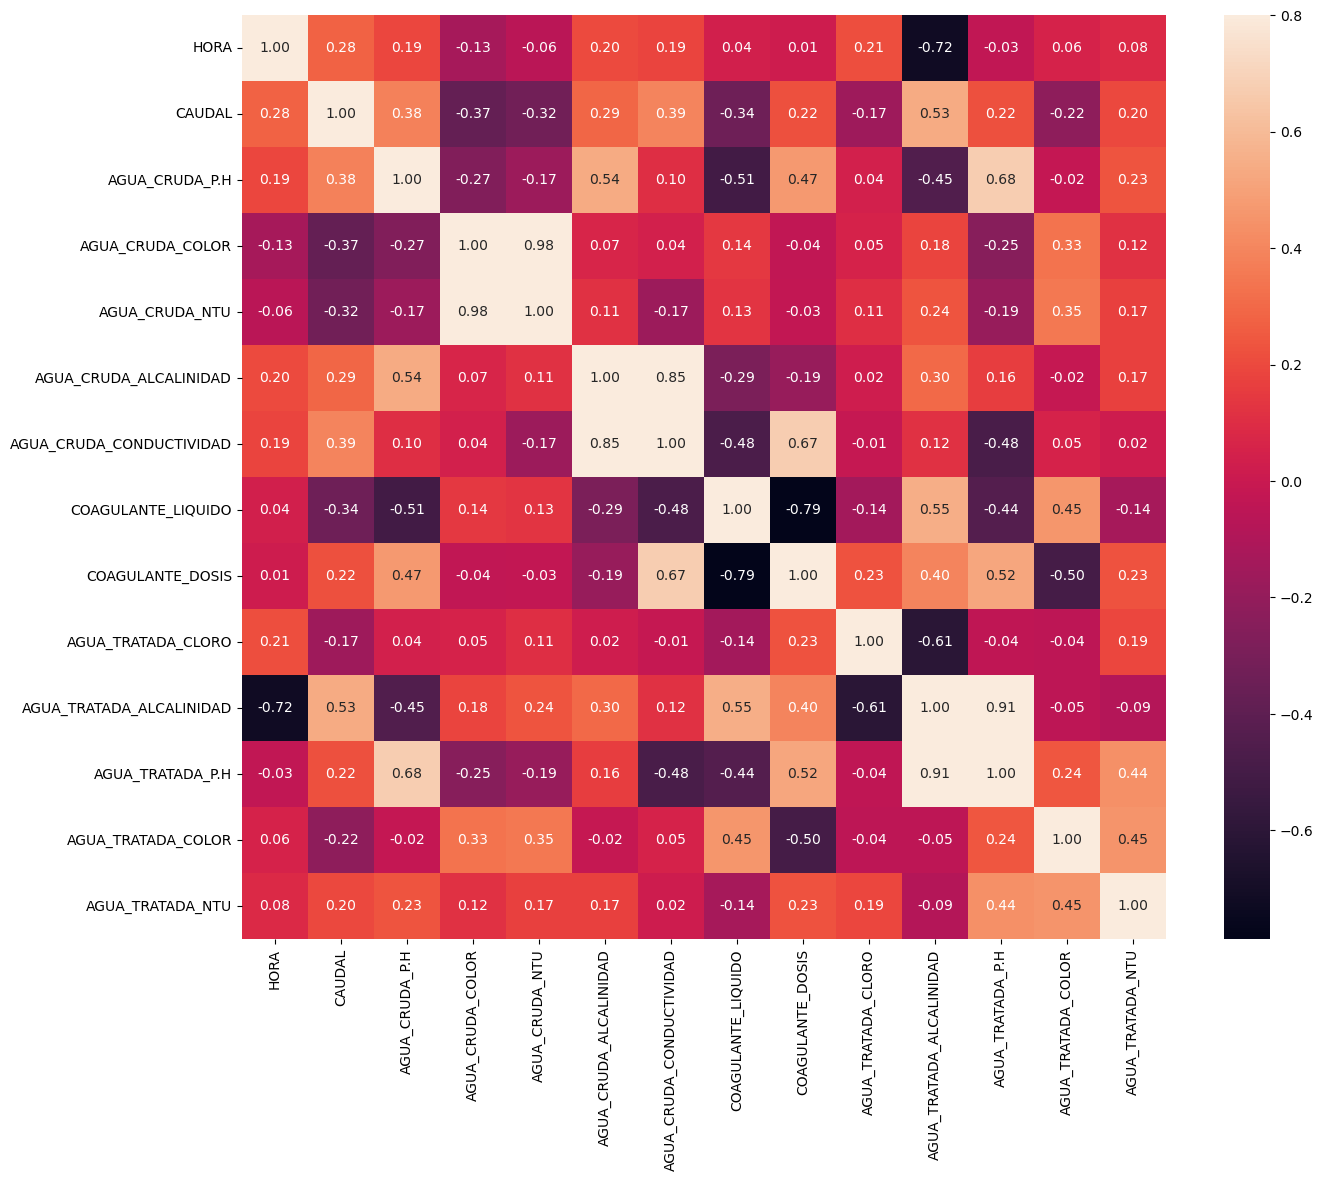

In [70]:
# Matriz de correlación:
corrmat = df_liquido.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

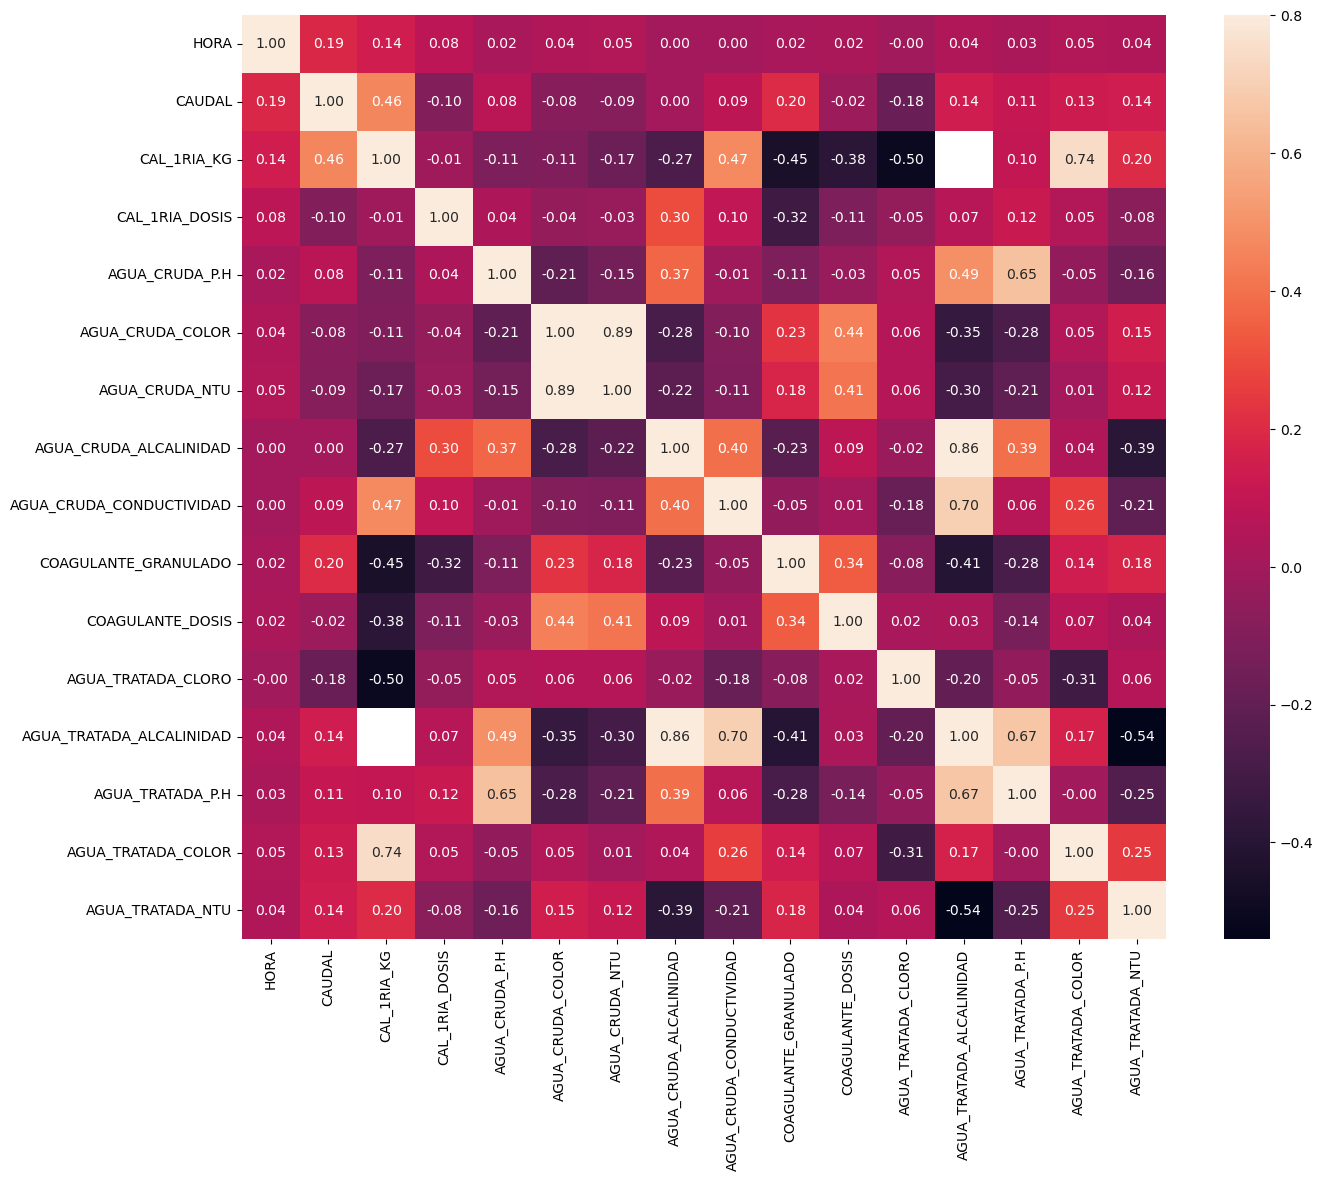

In [71]:
# Matriz de correlación:
corrmat = df_granulado.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

In [72]:
HEADERS_LIQUIDO = ['FECHA', 'HORA', 'CAUDAL', 'AGUA_CRUDA_P.H', 'AGUA_CRUDA_COLOR', 'AGUA_CRUDA_NTU', 'AGUA_CRUDA_ALCALINIDAD', 
                   'AGUA_CRUDA_CONDUCTIVIDAD', 'COAGULANTE_LIQUIDO', 'COAGULANTE_DOSIS','AGUA_TRATADA_CLORO', 
                   'AGUA_TRATADA_ALCALINIDAD', 'AGUA_TRATADA_P.H', 'AGUA_TRATADA_COLOR', 'AGUA_TRATADA_NTU','PRECIPITACION','VEL_VIENTO','TEMP_SECA','TEMP_HUMEDA']

HEADERS_GRANULADO = ['FECHA', 'HORA', 'CAUDAL', 'CAL_1RIA_KG', 'CAL_1RIA_DOSIS', 'AGUA_CRUDA_P.H', 'AGUA_CRUDA_COLOR', 
                     'AGUA_CRUDA_NTU', 'AGUA_CRUDA_ALCALINIDAD', 'AGUA_CRUDA_CONDUCTIVIDAD', 'COAGULANTE_GRANULADO', 
                     'COAGULANTE_DOSIS', 'AGUA_TRATADA_CLORO', 'AGUA_TRATADA_ALCALINIDAD', 'AGUA_TRATADA_P.H', 
                     'AGUA_TRATADA_COLOR', 'AGUA_TRATADA_NTU','PRECIPITACION','VEL_VIENTO','TEMP_SECA','TEMP_HUMEDA']

In [73]:
df_liquido = df_without_outliers[df_without_outliers['COAGULANTE_LIQUIDO'].notnull()]
df_liquido = df_liquido[HEADERS_LIQUIDO]
df_granulado = df_without_outliers[df_without_outliers['COAGULANTE_LIQUIDO'].isnull()]
df_granulado = df_granulado[HEADERS_GRANULADO]

In [74]:
filtro_mitad_liquido= df_liquido['FECHA'].dt.year.isin([2017, 2018, 2019])
filtro_mitad_granulado= df_granulado['FECHA'].dt.year.isin([2017, 2018, 2019])

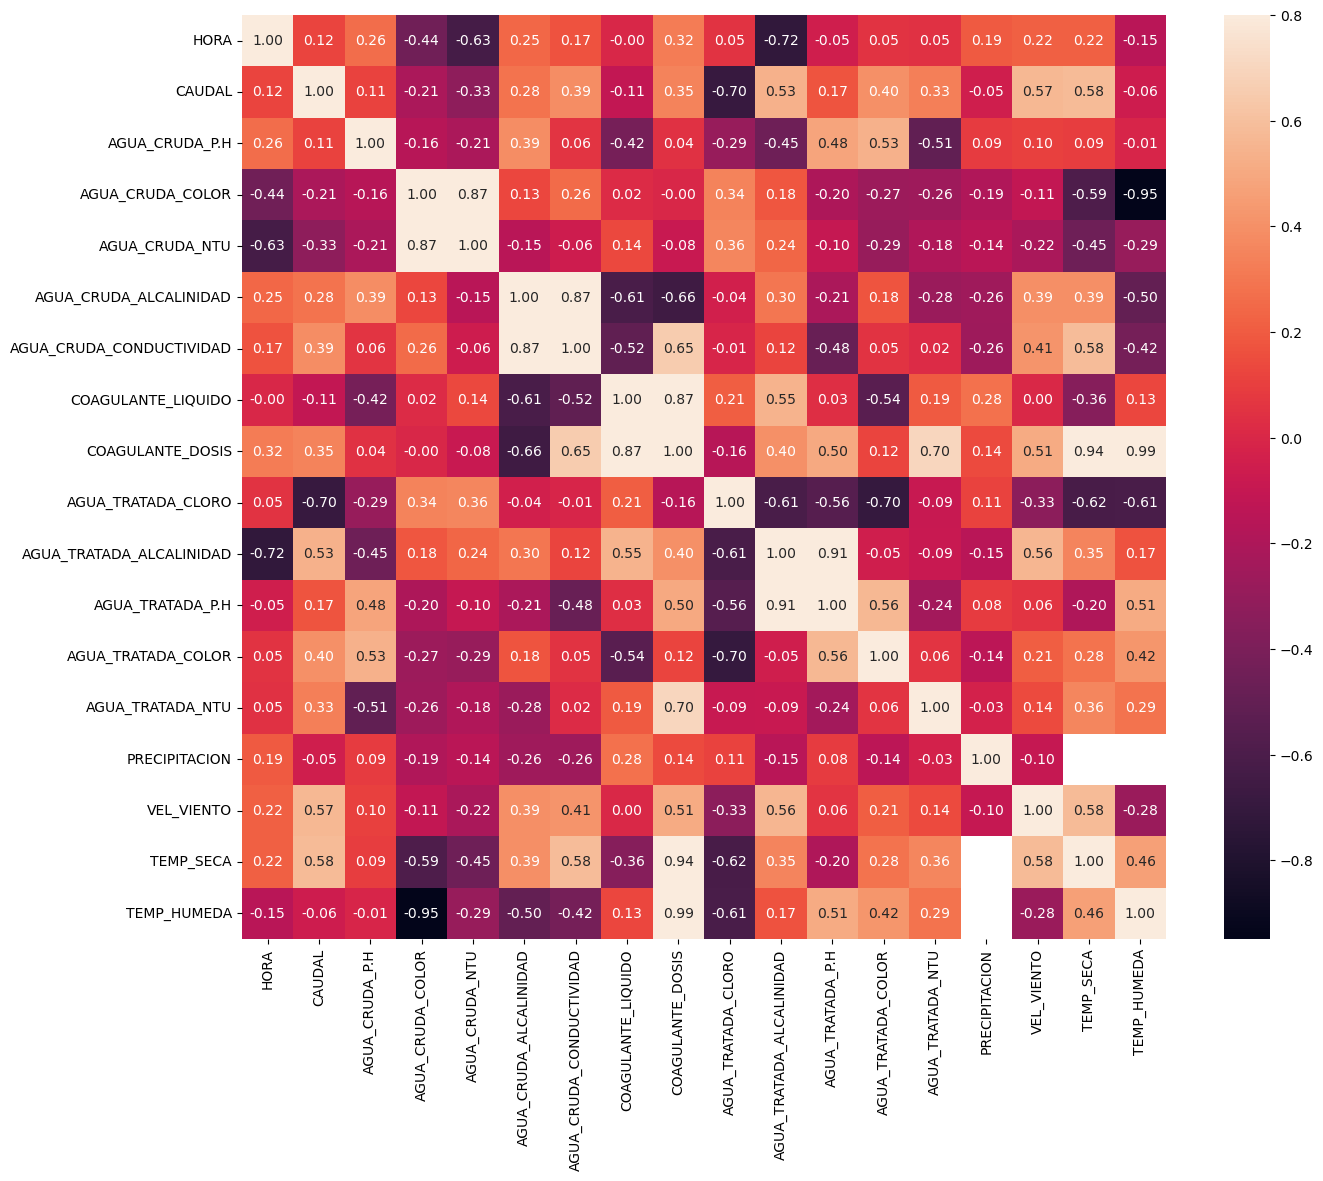

In [75]:
# Correlación años de la mitad
corrmat = df_liquido[filtro_mitad_liquido].corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

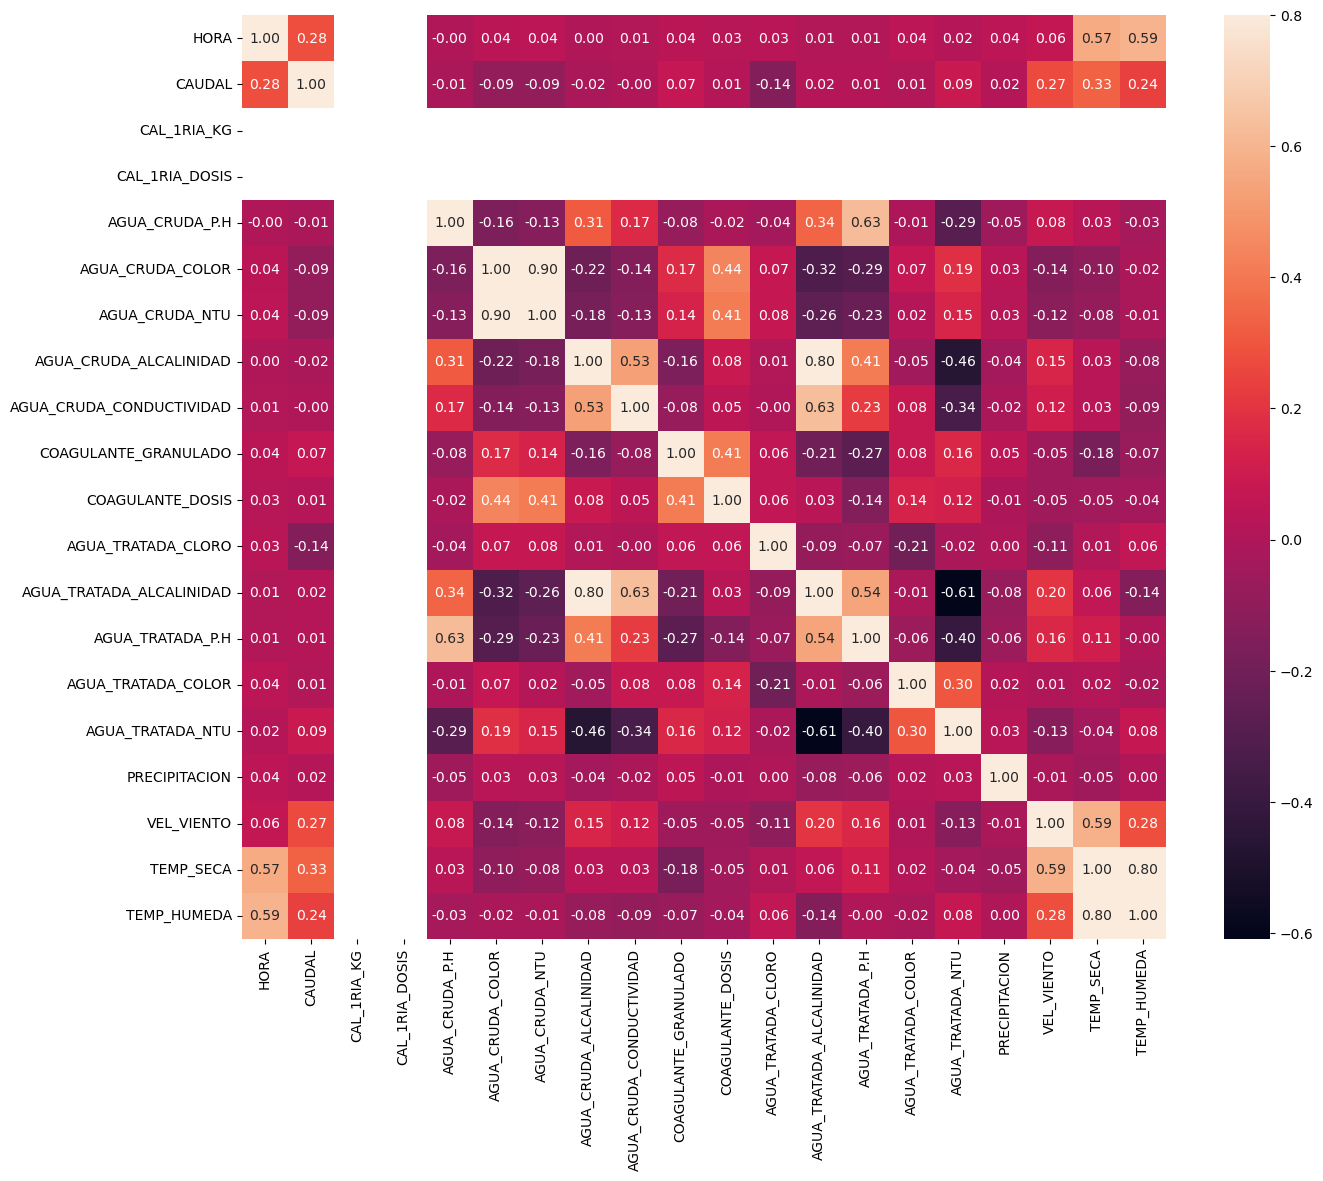

In [76]:
# Correlación años de la mitad
corrmat = df_granulado[filtro_mitad_granulado].corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

In [77]:
df_outliers = df[~df.index.isin(df_without_outliers.index)]
df_outliers_edit = df_edit[~df_edit.index.isin(df_without_outliers_edit.index)]

In [78]:
# df_without_outliers['TEMP_SECA'] = df_without_outliers['TEMP_SECA'].fillna(14)

In [79]:
df_outliers.to_csv('../data/dataframe_outliers.csv', sep=',')
df_without_outliers.to_csv('../data/dataframe_without_outliers.csv', sep=',')
df_outliers_edit.to_csv('../data_edit/dataframe_outliers.csv', sep=',')
df_without_outliers_edit.to_csv('../data_edit/dataframe_without_outliers.csv', sep=',')

In [80]:
df_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86185 entries, 0 to 87647
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FECHA                     86185 non-null  datetime64[ns]
 1   HORA                      86185 non-null  int64         
 2   CAUDAL                    86167 non-null  float64       
 3   CAL_1RIA_KG               27 non-null     float64       
 4   CAL_1RIA_DOSIS            556 non-null    float64       
 5   AGUA_CRUDA_P.H            85831 non-null  float64       
 6   AGUA_CRUDA_COLOR          80395 non-null  float64       
 7   AGUA_CRUDA_NTU            86100 non-null  float64       
 8   AGUA_CRUDA_ALCALINIDAD    67791 non-null  float64       
 9   AGUA_CRUDA_CONDUCTIVIDAD  59558 non-null  float64       
 10  COAGULANTE_GRANULADO      5788 non-null   float64       
 11  COAGULANTE_LIQUIDO        135 non-null    float64       
 12  COAGULANTE_DOSIS  

In [81]:
df_without_outliers_edit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51705 entries, 35 to 87647
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FECHA                     51705 non-null  datetime64[ns]
 1   HORA                      51705 non-null  int64         
 2   CAUDAL                    51694 non-null  float64       
 3   CAL_1RIA_KG               25 non-null     float64       
 4   CAL_1RIA_DOSIS            538 non-null    float64       
 5   AGUA_CRUDA_P.H            51413 non-null  float64       
 6   AGUA_CRUDA_COLOR          48800 non-null  float64       
 7   AGUA_CRUDA_NTU            51620 non-null  float64       
 8   AGUA_CRUDA_ALCALINIDAD    42813 non-null  float64       
 9   AGUA_CRUDA_CONDUCTIVIDAD  38109 non-null  float64       
 10  COAGULANTE_GRANULADO      5727 non-null   float64       
 11  COAGULANTE_LIQUIDO        132 non-null    float64       
 12  COAGULANTE_DOSIS 